In [1]:
import flopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [21]:
wel_path = "C:/Users/johnn/Desktop/file/choshui.wel"
i = 0
p = np.zeros((9, 400, 309), dtype = float)
rech, wel = [], []
p_map = {}

with open(wel_path) as f:
    for line in f.readlines():
        if i>=2:
            break
        elif 'Period' in line:
            i+=1
        elif i==1:
            line = line.replace('-',' -')
            s = line.split(' ')
            s = [float(x) for x in s if x != '']
            
            if s[3]>0:
                rech.append(s)
                p[int(s[0])-1][399-int(s[1])][int(s[2])] = s[3]
            elif s[3]<0:
                wel.append(s)
                p[int(s[0])-1][399-int(s[1])][int(s[2])] = s[3]
                
            if s[3] not in p_map:
                p_map[s[3]] = 1
            else:
                p_map[s[3]] += 1
            
                           

In [22]:
print(p_map)

{7.8125: 398, -7.8024998: 16147, 7.8225002: 15734, -3.9012499: 18, -3.89625: 222, -7.7925: 66, 3.90625: 51, -8.8125: 101819, 6.8125: 26430, 3.40625: 14, -4.40625: 42, -16.625: 1127}


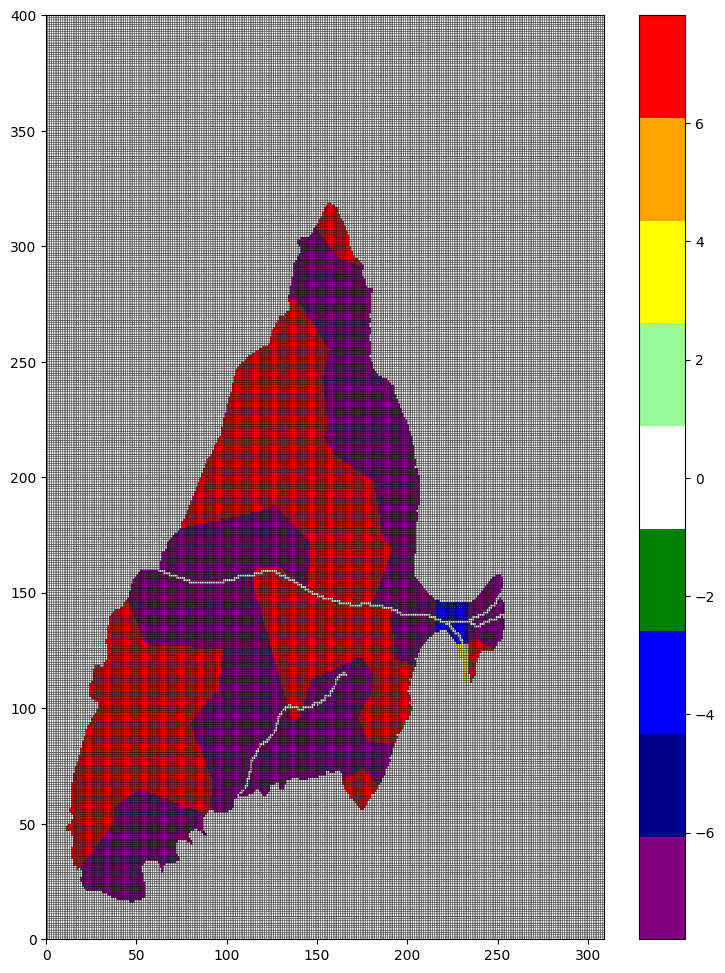

In [32]:
cmap = colors.ListedColormap(['purple','darkblue','blue','green','white','palegreen','yellow','orange','red'])

plt.figure(figsize=(9,12))
plt.pcolor(p[0], cmap=cmap, edgecolors='black')
plt.colorbar()
plt.show()

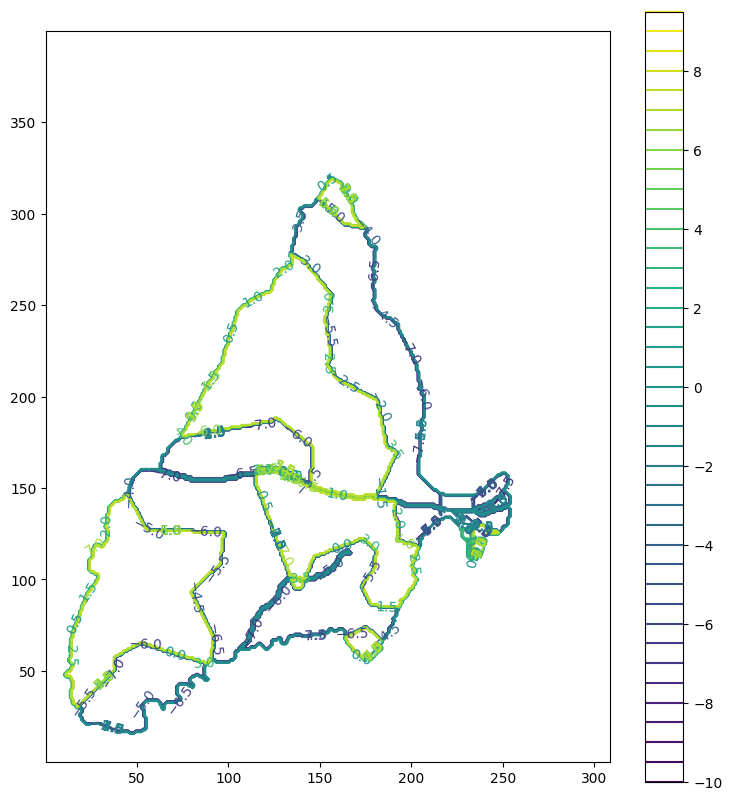

In [7]:
delc, delr = 1,1
Lx, Ly = 309, 400

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1,aspect='equal')

levels = np.arange(-10,10,0.5)                             #等高線間隔
extent = (delr/2.0, Lx-delr/2.0, delc/2.0, Ly-delc/2.0)   #(x0,x1,y0,y1): (x0, y0),(x1, y1)=position of Z[0,0],Z[-1,-1]

CS = plt.contour(p, levels=levels, extent=extent)   #等高線圖
plt.clabel(CS, inline=True, fontsize=10)
#plt.title(f"t={10*(t+1)}(days)")
plt.colorbar()